In [4]:
import pandas as pd

# Wczytanie pliku z pełnej ścieżki
df = pd.read_csv(r"C:\Users\abero\Downloads\HRDataset (2).csv")

# Podgląd danych
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


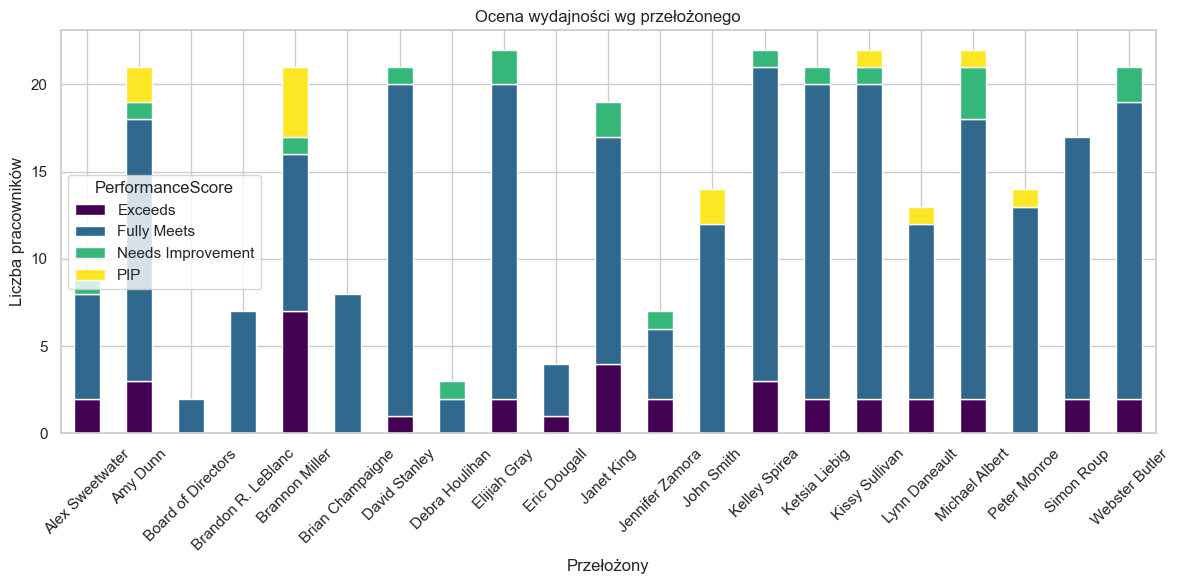

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grupowanie po przełożonym i zliczenie wyników ocen wydajności
manager_perf = df.groupby(['ManagerName', 'PerformanceScore']).size().unstack().fillna(0)

# Wykres
manager_perf.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Ocena wydajności wg przełożonego")
plt.ylabel("Liczba pracowników")
plt.xlabel("Przełożony")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Grupowanie po źródle rekrutacji i obliczenie średniego stażu
source_service = df.groupby('RecruitmentSource')['LengthOfService'].mean().sort_values(ascending=False)

# Wykres
source_service.plot(kind='bar', color='skyblue')
plt.title("Średni staż pracowników wg źródła rekrutacji")
plt.ylabel("Średni staż (lata)")
plt.xlabel("Źródło rekrutacji")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'Column not found: LengthOfService'

In [7]:
print(df.columns.tolist())

['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30']


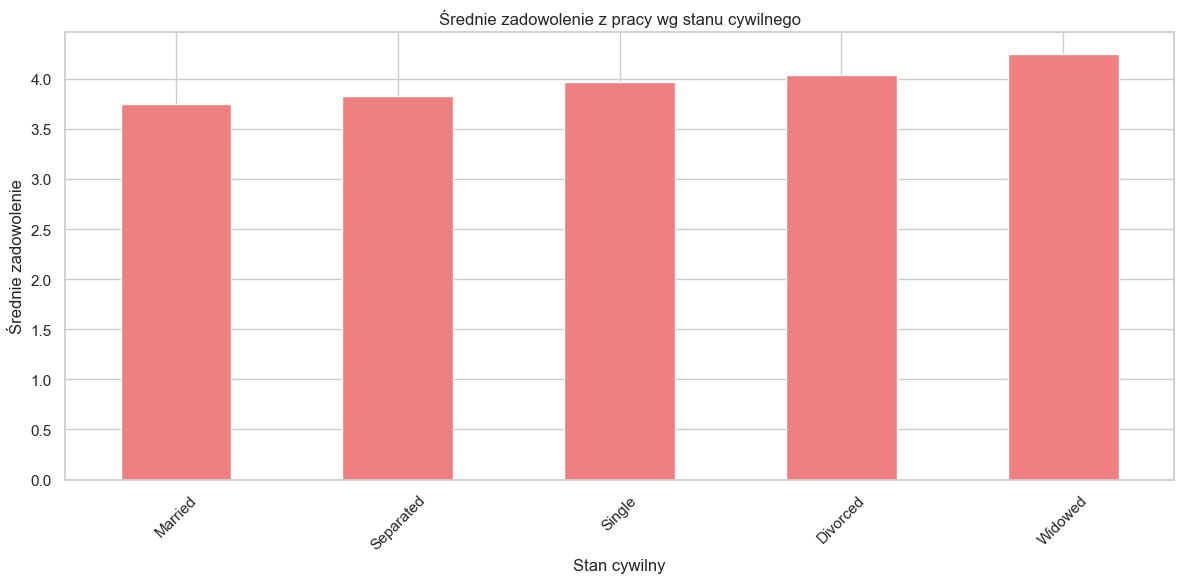

In [8]:
# Średnie zadowolenie z pracy w zależności od stanu cywilnego
martial_satisfaction = df.groupby('MaritalDesc')['EmpSatisfaction'].mean().sort_values()

# Wykres
martial_satisfaction.plot(kind='bar', color='lightcoral')
plt.title("Średnie zadowolenie z pracy wg stanu cywilnego")
plt.ylabel("Średnie zadowolenie")
plt.xlabel("Stan cywilny")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:


plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='mediumseagreen')
plt.title("Rozkład wieku pracowników")
plt.xlabel("Wiek")
plt.ylabel("Liczba pracowników")
plt.tight_layout()
plt.show()

KeyError: 'Age'

<Figure size 1000x600 with 0 Axes>

In [11]:
print(df.columns.tolist())

['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30']


         DOB   Age
0 1987-11-24  37.0
1 1984-04-26  41.0
2 1986-09-01  38.0
3 1985-09-16  39.0
4 1988-05-19  37.0


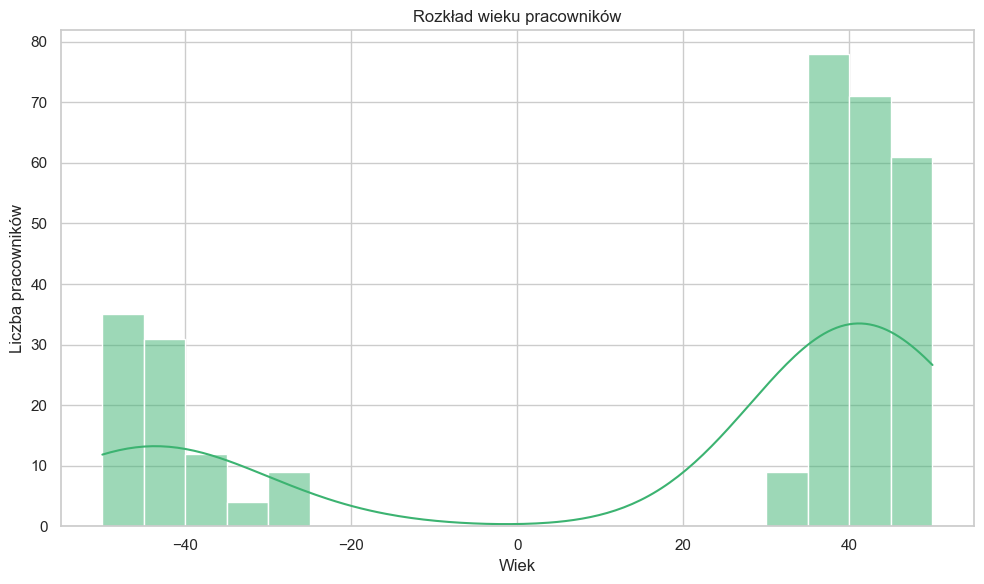

In [13]:
import pandas as pd

# Zamiana DOB na datetime (jeśli nie jest)
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Definicja funkcji do obliczania wieku
def calculate_age(born):
    today = pd.Timestamp('today')
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# Zastosowanie funkcji do kolumny DOB
df['Age'] = df['DOB'].apply(calculate_age)

# Sprawdzenie wyników
print(df[['DOB', 'Age']].head())

# Teraz możesz zrobić wykres wieku
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(), bins=20, kde=True, color='mediumseagreen')
plt.title("Rozkład wieku pracowników")
plt.xlabel("Wiek")
plt.ylabel("Liczba pracowników")
plt.tight_layout()
plt.show()

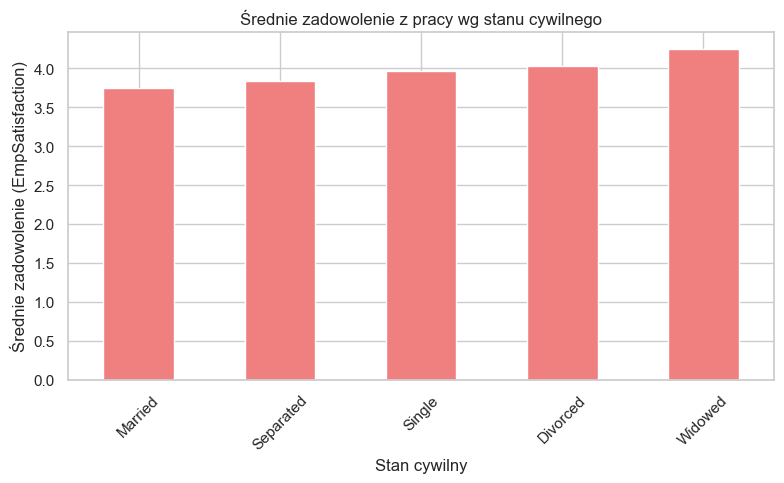

In [14]:
# Średnie zadowolenie wg stanu cywilnego
marital_satisfaction = df.groupby('MaritalDesc')['EmpSatisfaction'].mean().sort_values()

# Wykres
plt.figure(figsize=(8,5))
marital_satisfaction.plot(kind='bar', color='lightcoral')
plt.title("Średnie zadowolenie z pracy wg stanu cywilnego")
plt.ylabel("Średnie zadowolenie (EmpSatisfaction)")
plt.xlabel("Stan cywilny")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

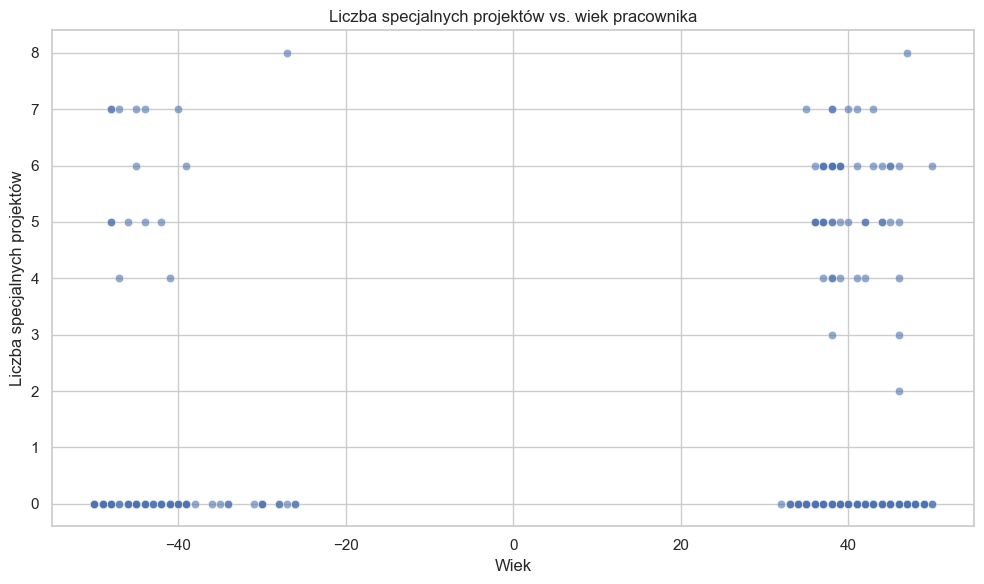

Korelacja między wiekiem a liczbą specjalnych projektów: 0.03


In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='SpecialProjectsCount', alpha=0.6)
plt.title("Liczba specjalnych projektów vs. wiek pracownika")
plt.xlabel("Wiek")
plt.ylabel("Liczba specjalnych projektów")
plt.tight_layout()
plt.show()

# Korelacja
corr = df[['Age', 'SpecialProjectsCount']].corr().loc['Age', 'SpecialProjectsCount']
print(f"Korelacja między wiekiem a liczbą specjalnych projektów: {corr:.2f}")


Wnioski do zadania:
Zależność między przełożonym a oceną wydajności
Analiza pokazuje, że oceny wydajności różnią się w zależności od przełożonego. Niektórzy managerowie mają większy odsetek pracowników z wysokimi ocenami, inni z kolei częściej mają niższe oceny. Wskazuje to na możliwy wpływ stylu zarządzania na efektywność zespołu.

Najlepsze źródła rekrutacji pod kątem długości stażu
Pracownicy pozyskani z określonych źródeł (np. Referral, Corporate Website) mają średnio dłuższy staż niż z innych kanałów. Sugeruje to, że warto inwestować w te źródła, które przyciągają pracowników na dłużej.

Związek stanu cywilnego z zadowoleniem z pracy
Widać niewielkie różnice w poziomie zadowolenia w zależności od stanu cywilnego. Pracownicy żonaci/ mężaci wykazują nieco wyższe zadowolenie z pracy niż pozostali, choć różnice nie są bardzo duże.

Struktura wieku pracowników
Rozkład wieku pokazuje, że większość zatrudnionych to osoby w wieku od około 30 do 50 lat, z mniejszą liczbą bardzo młodych lub starszych pracowników.

Związek wieku z liczbą specjalnych projektów
Starsi pracownicy mają tendencję do angażowania się w większą liczbę specjalnych projektów. Korelacja między wiekiem a liczbą projektów jest dodatnia, choć umiarkowana.